# Data Visualizaion on Haberman Dataset

```

9.16 Exercise: Perform EDA on Haberman dataset

Assignment:

Data Visualization with Haberman Dataset

—————————————-

This is the first assignments on data visualization.

You can get the data from https://www.kaggle.com/gilsousa/habermans-survival-data-set.

try to document every plot and every analysis you do, please refer attached notebook.
Note: Upload both python notebook and pdf version of that notebook
Check this: https://ipython.org/ipython-doc/3/notebook/nbconvert.html  to convert python notebooks to pdfs.
```

1. Download Haberman Cancer Survival dataset from Kaggle.
2. Perform following analysis:
    1. High level Statistics of the dataset
        1. Number of Points
        2. Number of Features
        3. Number of Classes
        4. Data-points per class
    2. Explain Objective
    3. Perform Univariate Analysis (to understand which features are useful towards classification)
        1. PDF
        2. CDF
        3. Boxplot
        4. Violin Plots
    4. Perform Bi-variate Analysis (to see if combinations of features are useful in classification)
        1. Scatter Plots
        2. Pair-plots
3. Write your Observation    

In [1]:
# Importing required packages for this analysis
import pandas as pd # for handling CSV file as data frames
import seaborn as sns # for pair-plot, box-plot, violin-plot
import matplotlib.pyplot as plt # for subplots

# Obtain the Data set

```
I have downloaded the dataset from https://www.kaggle.com/gilsousa/habermans-survival-data-set
```

## What is in the given data set

In [2]:
# read the data set
df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Observation

- There is no column name, so nothing able to get from the CSV file.
- Also since there is no column names, one of the data point is considered as column name, which should be corrected
- I think I need to refer data set provider to know more about the data - Kaggle Site

## What is given in the data set (Domain Knowledge)

- From https://www.kaggle.com/gilsousa/habermans-survival-data-set, I can see below information about the given dataset
    - Haberman's Survival Data Set
    - Survival of patients who had undergone surgery for breast cancer
    - The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
    - Data
        - Age of patient at time of operation (numerical)
            - Age of the patient when went through Cance Operation
        - Patient's year of operation (year - 1900, numerical)
            - In which year operation for cancer was made
        - Number of positive axillary nodes detected (numerical)
            - Link - https://www.cancercenter.com/terms/lymph-nodes/
        - Survival status (class attribute)
            - 1 = the patient survived 5 years or longer
            - 2 = the patient died within 5 year

### Observation

- Following features are given
    - Age
    - Year Of Operation
    - Number of Nodes found
- Following Label is given
    - Survival Status of that patient

# Highlevel Statistics - Understand the given Data Set

```
Get the Domain Knowledge to analyse the data in right way
```

## Is the data intact?

### Add Column Header

In [3]:
# Add the column name for easy handling
df = pd.read_csv('haberman.csv', names=['Age', 'YearOfOp', 'Nodes', 'SurvivalStatus'])
df.head()

,Age,YearOfOp,Nodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
### Sort data according to year of operation
# df.sort_values('YearOfOp',inplace=True)

## Looking into Data

In [5]:
# Shape of the data
df.shape

# Observation
# 306 data-points
# 4 features

(306, 4)

In [6]:
# Names of the Columns
df.columns

Index(['Age', 'YearOfOp', 'Nodes', 'SurvivalStatus'], dtype='object')

In [7]:
# Whether all the data are numerical?
df.dtypes

Age               int64
YearOfOp          int64
Nodes             int64
SurvivalStatus    int64
dtype: object

In [8]:
# look into data description for abnormality
df.describe()

,Age,YearOfOp,Nodes,SurvivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Number of Data Points, Features

In [9]:
# Find number of data-points in the given dataset
df.shape

# 306 data-poitns found in it
# 4 Fields found in it

(306, 4)

## Number of Classes

In [10]:
# Find class attributes
df.SurvivalStatus.unique()

array([1, 2])

## Number of Data-Points per class

In [11]:
# find how many data-points given for each class
# This is to find whether the given data-set is balanced or not?

df['SurvivalStatus'].value_counts()

1    225
2     81
Name: SurvivalStatus, dtype: int64

## Age Range of data set

In [12]:
print(df.Age.min(), df.Age.max())

30 83


## Nodes Range - how many nodes a people might had?

In [13]:
print(df.Nodes.min(), df.Nodes.max())
df.Nodes.unique()

0 52


array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28])

## Observation

- 306 data-points found in the given dataset
- 3 Features
    - Age of person at the time operation, 
    - Year in which cancer operation was made
    - Number of Nodes found before operation
    - since all above three are not dependent to each other, those are independent variables
- 1 Label
    - Survival rate of the patient after the operation
        - This depends on above independent variables
    - There are two classes
        - 1
            - patient who survived less than 5 years after operation
        - 2
            - patient who survived more than 5 years after operation
- We have been given an Imbalanced data-set
    - 225 patiens belongs to Class 1
    - 81 patients belongs to Class 2
- All are Numerical
    - Both features and Label are numerical

# Objective

```
Identify/Define our Objective/ Task in this problem?
```

From previous observation, it is clear that we need to predict (classify) the patients survival time based on their (1)Age, (2)Year of Operation recorded he had and (3) number of positive swollen lymph cells that he had at that time.

Only two classes of surival given, so it is a Binary Classification problem

Objective: is to classify a new cancer patient's survival rate (less than 5 years or more) using given Age, Year of Operation, Cancer Stage

# Univariate Analysis

In [14]:
# Configure SNS plotting
sns.set_style('whitegrid')

In [15]:
# Create seprate data frames for each feature against the class
df_s1 = df.loc[df.SurvivalStatus == 1]
df_s2 = df.loc[df.SurvivalStatus == 2]

## PDF, CDF

/home/mlstudy/anaconda3/envs/mlstudy_1/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


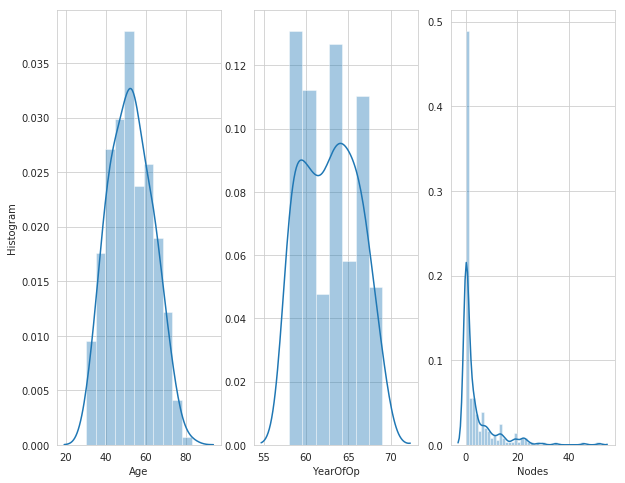

In [16]:
# PDF
f, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,8)) # Creating a sub-plot of 1 row, 3 columns to display all three features's PDF

axes[0].set_ylabel('Histogram')
sns.distplot(df['Age'], ax=axes[0])
sns.distplot(df['YearOfOp'], ax=axes[1])
sns.distplot(df['Nodes'], ax=axes[2])

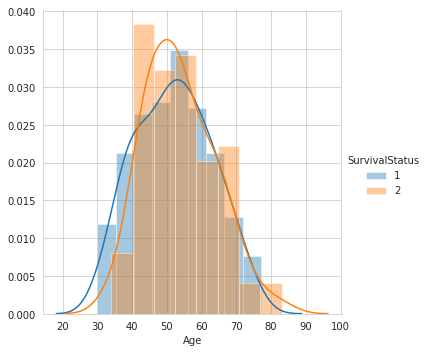

In [17]:
# # PDF of Age against Survival Status
# g = sns.FacetGrid(data=df, col='SurvivalStatus', size=5).add_legend()
# g = g.map(sns.distplot, 'Age')

# PDF of 'Age' having color variation over survival range
sns.FacetGrid(df, hue='SurvivalStatus', height=5).map(sns.distplot, "Age").add_legend()

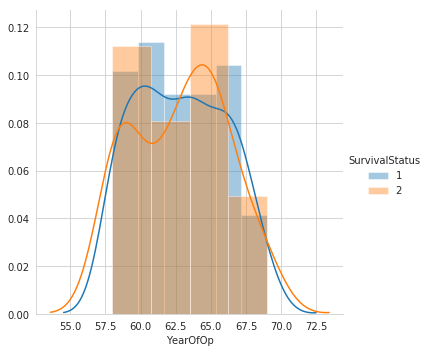

In [18]:
# # PDF of YearOfOp against Survival Status
# g = sns.FacetGrid(data=df, col='SurvivalStatus', size=5).add_legend()
# g = g.map(sns.distplot, 'YearOfOp')

# PDF of 'Year of Operation' having color variation over survival range
sns.FacetGrid(df, hue='SurvivalStatus', height=5).map(sns.distplot, 'YearOfOp').add_legend()

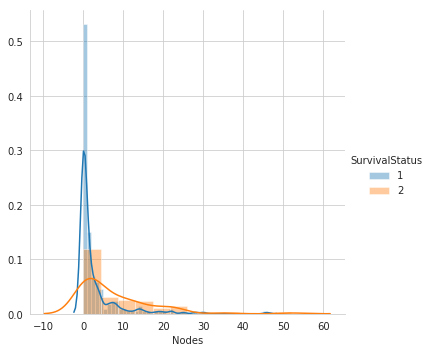

In [19]:
# # PDF based on Nodes against Survival Status
# g = sns.FacetGrid(data=df, col='SurvivalStatus', size=5).add_legend()
# g = g.map(sns.distplot, 'Nodes')

# PDF of 'Nodes' having color variation over survival range
sns.FacetGrid(df, hue='SurvivalStatus', height=5).map(sns.distplot, 'Nodes').add_legend()

### Observation

- Age
    - There is no direct relation between Age and Survival Category
    - Almost patients of all age group fall into both survival category. So using, only Age, we can't predict/classify
- Year Of Operation
    - There is no direct relation between Operation Year and Survival Category
    - So using only Year of Operation, we can't predict or we can't assume about their survival rate.
- Nodes
    - PDF is not meaningful in this data (since values starts from 0)
    - People who had more than 25 nodes didn't survive more than 5 years
    - People who had less than 6 nodes survived more thaan 5 years

## Box Plot

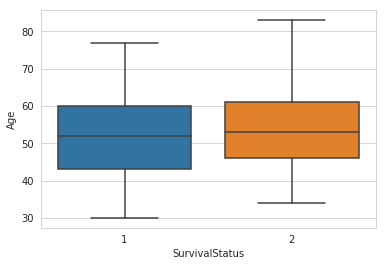

In [20]:
# Box plot with Age vs SurvivalStatus
sns.boxplot(data=df, x='SurvivalStatus', y='Age')

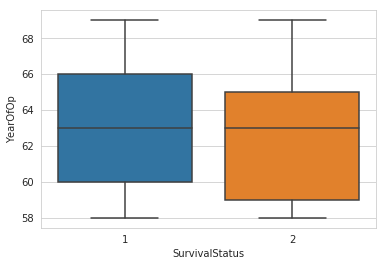

In [21]:
# Box plot with Age vs SurvivalStatus
sns.boxplot(data=df, x='SurvivalStatus', y='YearOfOp')

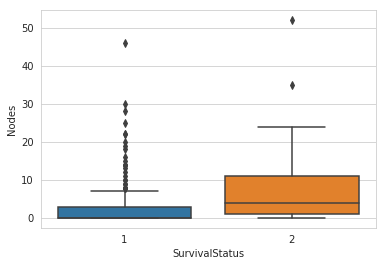

In [22]:
# Box plot with Age vs SurvivalStatus
sns.boxplot(x='SurvivalStatus', y='Nodes', data=df)

### Observation

- Age
    - Equal survival status seen between people of age between 35 and 60.
    - So there is no relation between age and survival rate
- YearOfOp
    - Survival range between age of 59 to 63
- Nodes
    - Nothing able to deduce from this Box Plot

## Violin Plot

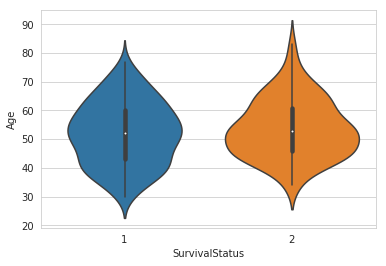

In [23]:
# Violin based on Age against Surival Status
sns.violinplot(x='SurvivalStatus',y='Age',data=df, size=10)

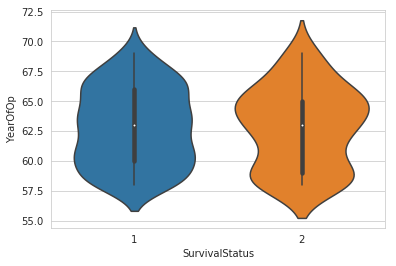

In [24]:
# Violin based on Year of Operation against Surival Status
sns.violinplot(x='SurvivalStatus',y='YearOfOp',data=df, size=12)
plt.show()

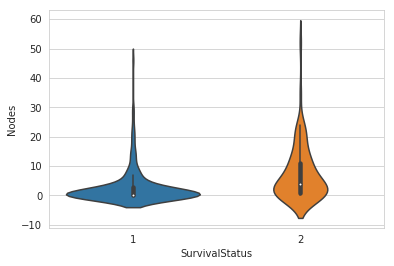

In [25]:
# Violin based on Nodes against Surival Status
sns.violinplot(x='SurvivalStatus',y='Nodes',data=df, size=10)
plt.show()

### Observataion

- Observation was similar to PDF. CDF. Boxplot
- Age
    - No relationship between Age and Surival Status
- Year of Operation
    - No relation between Year of Operation and Survival Status
    - Since data is imbalanced, there is little variance between violin plot of Survival Status '1' and '2' which I guess won't be there when we have balanced data
- Nodes
    - Mid 50% (IQR) of Nodes have both kind of Survival Status.
    - So, we can't make assume a direct relation between Nodes and Survival Status when considering Imbalanced data

# Bivariate Analysis

## Scatter Plots

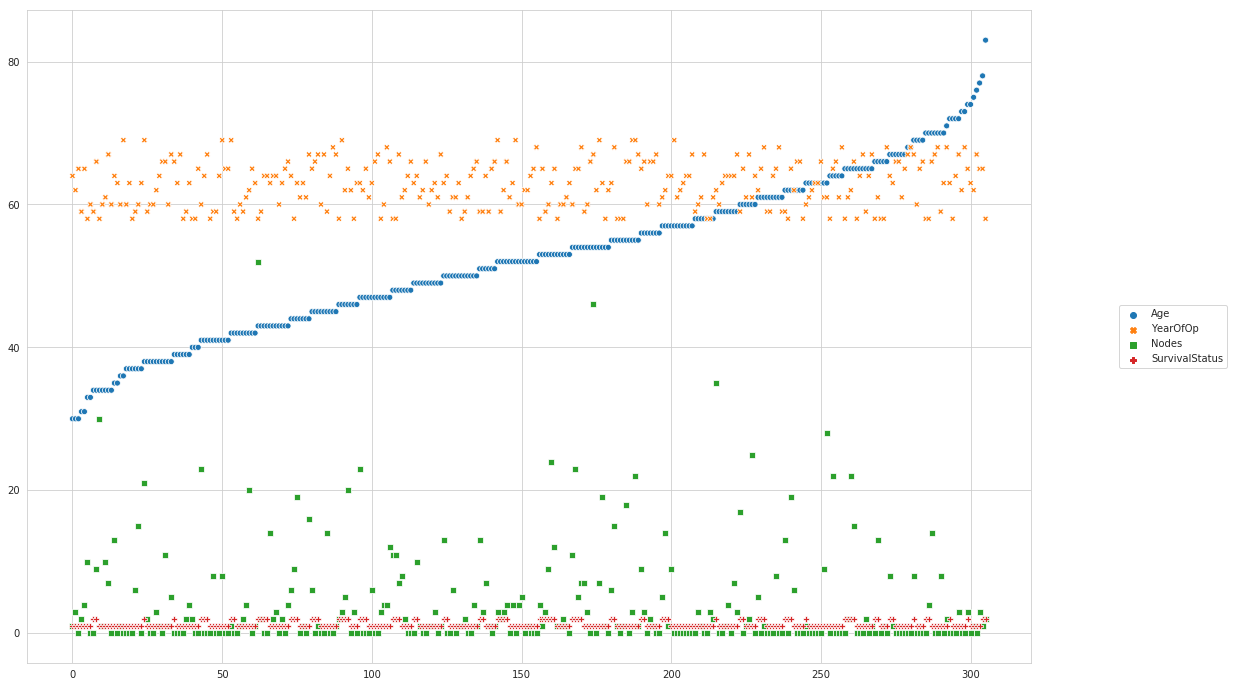

In [26]:
g = sns.scatterplot(data=df)
# resize figure box to -> put the legend out of the figure
box = g.get_position() # get position of figure
g.set_position([box.x0, box.y0, box.width * 3, box.height * 3]) # resize position
# Put a legend to the right side
g.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)

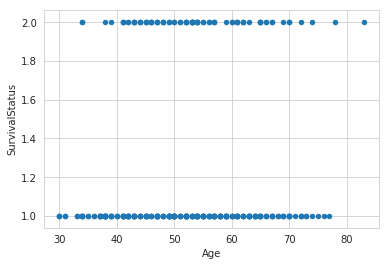

In [27]:
# Scatter Plot Age vs SurvivalStatus
df.plot(kind='scatter',x='Age',y='SurvivalStatus')

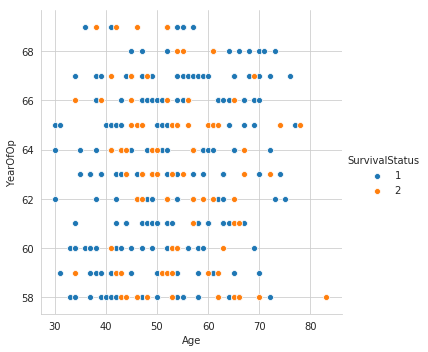

In [28]:
# Age vs YearOfOp
sns.FacetGrid(df, hue='SurvivalStatus', height=5).map(sns.scatterplot, 'Age', 'YearOfOp').add_legend()

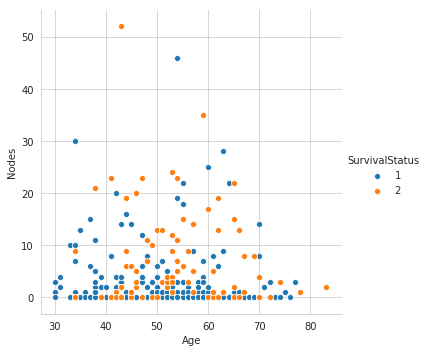

In [29]:
# Age vs Nodes
sns.FacetGrid(df, hue='SurvivalStatus', height=5).map(sns.scatterplot, 'Age', 'Nodes').add_legend()

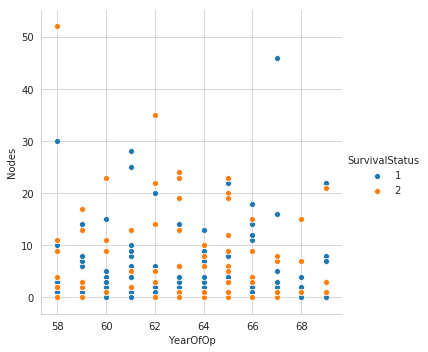

In [30]:
# YearOfOp vs Nodes
sns.FacetGrid(df, hue='SurvivalStatus', height=5).map(sns.scatterplot, 'YearOfOp', 'Nodes').add_legend()

## Pair Plots

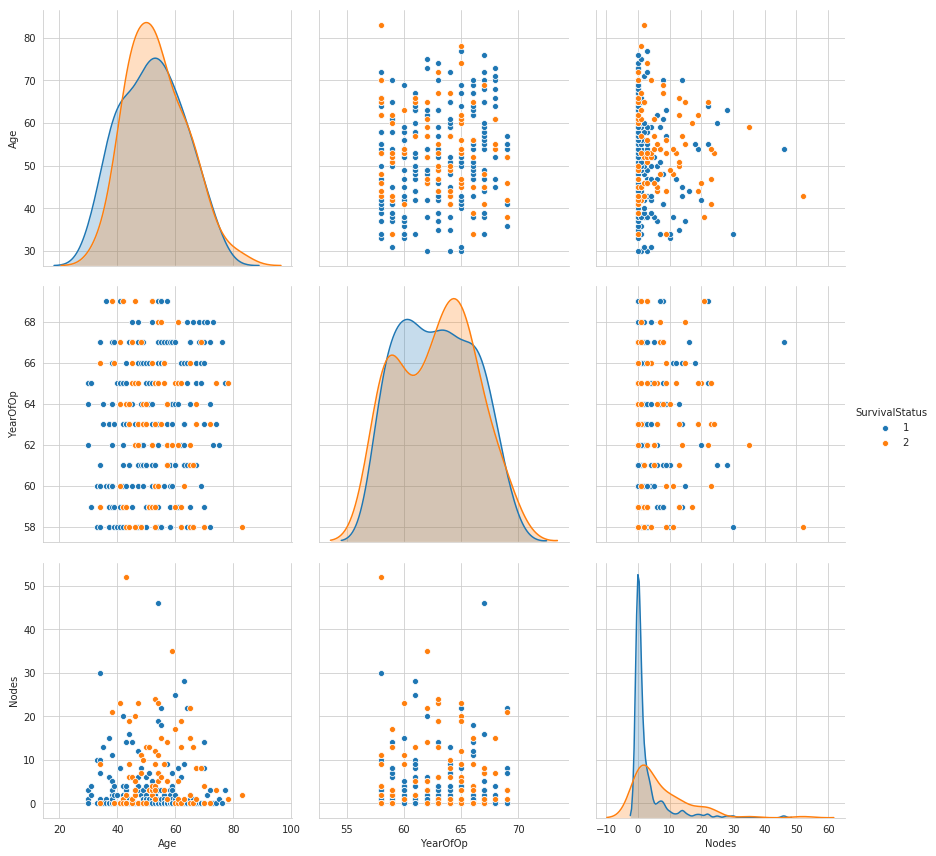

In [31]:
sns.pairplot(df, hue='SurvivalStatus',vars=['Age','YearOfOp','Nodes'], height=4)

# Observation

- We don't have any linearly seperable data
    - From Univariate analysis, it is clear that Age or YearOfOp or Nodes have no linearly seperable relationship with Surival Status
- We don't have bivariate relationship as well with survival data
    - Both surival case 1 and 2 are scatter along all the range of each pair
- In conclusion, we can't have either a simple if-else classifier model nor a linearly seperable classifier model